In [2]:
from PIL import Image
from keras.datasets import mnist
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
### Load the data ###

In [4]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
print(x_train[0],y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
x_train = x_train.reshape((-1,28*28))
x_test = x_test.reshape((-1,28*28))

In [8]:
print(x_train.shape)

(60000, 784)


In [9]:
x_train = (x_train/256)
x_test = (x_test/256)

In [10]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
 model = MLPClassifier(solver="adam",activation='relu',hidden_layer_sizes=(64,64))

In [12]:
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(64, 64))

In [19]:
prediction = model.predict(x_test)

In [20]:
accuracy = confusion_matrix(y_test,prediction) 
accuracy = np.array(accuracy)

In [21]:
print(accuracy)

[[ 968    0    1    1    1    2    2    0    3    2]
 [   0 1123    4    1    0    2    2    1    2    0]
 [   1    1 1012    3    3    0    2    4    5    1]
 [   0    0    0  992    0    4    0    5    5    4]
 [   2    1    3    2  954    0    5    2    2   11]
 [   5    1    0    8    2  866    6    2    1    1]
 [   3    2    2    0    5    5  939    0    2    0]
 [   2    3   10    5    1    0    0  998    4    5]
 [   2    0    2    3    7    3    1    3  950    3]
 [   2    3    0    5    9    1    1    5    8  975]]


In [22]:
def calc_accuracy(matrix):
    diagonal = np.trace(matrix)
    element = matrix.sum()
    return diagonal/element

In [23]:
print(calc_accuracy(accuracy))


0.9777


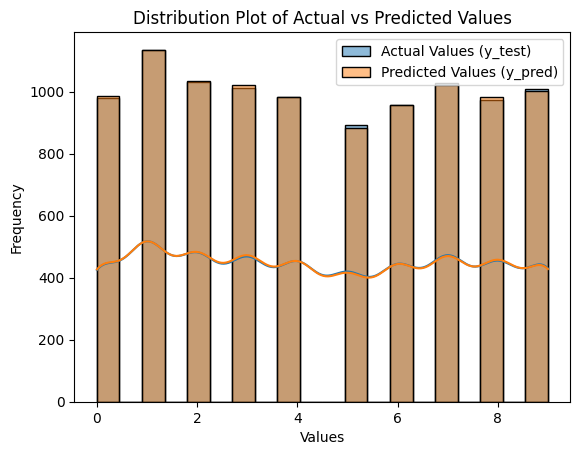

In [25]:

sns.histplot(y_test, kde=True, label='Actual Values (y_test)')
sns.histplot(prediction, kde=True, label='Predicted Values (y_pred)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Actual vs Predicted Values')
plt.legend()
plt.show()